In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

from google.colab import drive

drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os

os.chdir("/content/drive/My Drive/dissertation/creshes - notebook")


In [13]:
!ls

 2019-10-29_cozie_full.csv	  cresh17.ipynb
'barchart - 10-indoorAir.ipynb'   cresh18.ipynb
'barchart - 10.ipynb'		  cresh19.ipynb
 boxchart.ipynb			  cresh20.ipynb
 cresh01.ipynb			  cresh21.ipynb
 cresh02.ipynb			  cresh22.ipynb
 cresh03.ipynb			  cresh23.ipynb
 cresh04.ipynb			  cresh24.ipynb
 cresh05.ipynb			  cresh25.ipynb
 cresh06.ipynb			  cresh26.ipynb
 cresh07.ipynb			  cresh27.ipynb
 cresh08.ipynb			  cresh28.ipynb
 cresh09.ipynb			  cresh29.ipynb
 cresh10.ipynb			  cresh30.ipynb
 cresh11.ipynb			  cresh35.ipynb
 cresh12.ipynb			  cresh36.ipynb
 cresh13.ipynb			  cresh37.ipynb
 cresh14.ipynb			  cresh39.ipynb
 cresh15.ipynb			  cresh40.ipynb
 cresh16.ipynb			  thermal_preference_breakdown_11.csv


In [0]:
cmap = plt.cm.get_cmap('tab10')

c1 = cmap.colors[0]
c2 = cmap.colors[1]
c3 = cmap.colors[2]

# Test Plotting Bar Chart

In [0]:
creshVotes = [27,101,32]

preference_df = pd.read_csv("thermal_preference_breakdown_11.csv")
preferencefiltered_df = preference_df.drop(columns=['total','9_prefer_warmer', '10_neutral', '11_prefer_cooler', 'total_w/o_blanks'],axis=1)

usersTest = []
test09 = []
test10 = []
test11 = []

preferencefiltered_df = preferencefiltered_df.values.tolist()

# 0 = cresh, 1 = prefer warmer, 2 = neutral, 3 = prefer cooler
for i in range(len(preferencefiltered_df)):
    usersTest.append(preferencefiltered_df[i][0])
    test09.append(float(preferencefiltered_df[i][1].strip('%')))
    test10.append(float(preferencefiltered_df[i][2].strip('%')))
    test11.append(float(preferencefiltered_df[i][3].strip('%')))

xpos = np.arange(len(usersTest)) # X position for the bar to appear
width = 0.5  
    
tuple09 = tuple(test09)
tuple10 = tuple(test10)
tuple11 = tuple(test11)
tupleUsers = tuple(usersTest)    

votes_09 = np.array(tuple09)
votes_10 = np.array(tuple10)
votes_11 = np.array(tuple11)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


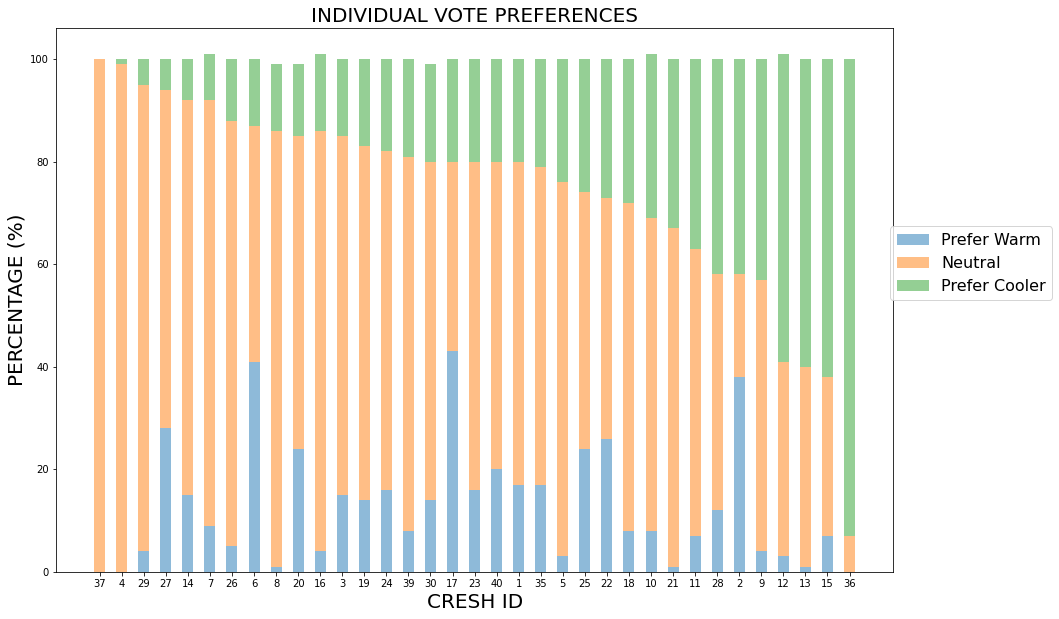

In [16]:
plt.figure(figsize=(15,10))

alpha_value = 0.5

p1 = plt.bar(xpos, votes_09, width, tick_label = xpos, label = 'Prefer Warm', color = c1, alpha = alpha_value)
p2 = plt.bar(xpos, votes_10, width, bottom = votes_09, label = 'Neutral', color = c2, alpha = alpha_value)
p3 = plt.bar(xpos, votes_11, width, bottom = votes_10 + votes_09, label = 'Prefer Cooler', color = c3, alpha = alpha_value)

plt.ylabel("PERCENTAGE (%)", fontsize = 20, fontname="Arial")
plt.xlabel("CRESH ID", fontsize = 20, fontname="Arial")
plt.title("INDIVIDUAL VOTE PREFERENCES", fontsize = 20)
plt.xticks(xpos, tupleUsers)
plt.legend(loc = "upper right", bbox_to_anchor = (1.2,0.65), fontsize = 16)
#plt.legend((p1[0], p2[0], p3[0]),("Warm", "No Changes", "Cooler"))


In [22]:
preference_df_clusters = pd.read_csv("thermal_preference_breakdown_11-clusters.csv")
preference_df_clusters.head()

,cresh,total,9_prefer_warmer,10_neutral,11_prefer_cooler,total_w/o_blanks,prefer_warmer,no_change,prefer_cooler,cluster
0,37,3,0,3,0,3,0%,100%,0%,2
1,4,133,0,128,1,129,0%,99%,1%,2
2,29,107,4,92,5,101,4%,91%,5%,2
3,8,158,2,127,20,149,1%,85%,13%,2
4,7,112,9,87,9,105,9%,83%,9%,2


In [26]:
preference_df_clusters_sorted = preference_df_clusters.sort_values('cluster')
preference_df_clusters_sorted.head(10)

,cresh,total,9_prefer_warmer,10_neutral,11_prefer_cooler,total_w/o_blanks,prefer_warmer,no_change,prefer_cooler,cluster
34,36,16,0,1,14,15,0%,7%,93%,1
32,15,125,8,38,75,121,7%,31%,62%,1
30,12,165,4,58,92,154,3%,38%,60%,1
29,13,109,1,39,61,101,1%,39%,60%,1
33,2,170,58,30,64,152,38%,20%,42%,1
28,28,110,13,48,44,105,12%,46%,42%,2
27,6,289,113,128,37,278,41%,46%,13%,2
26,22,85,20,37,21,78,26%,47%,27%,2
25,25,75,17,35,18,70,24%,50%,26%,2
24,9,111,4,53,43,100,4%,53%,43%,2


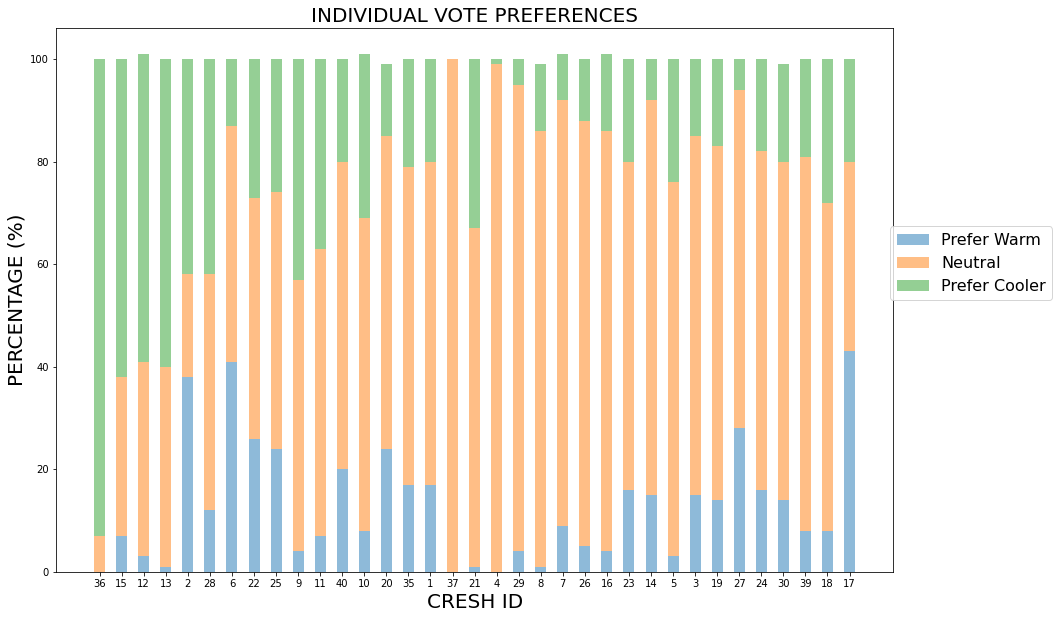

In [25]:
# from pinky's code above
usersTest = []
test09 = []
test10 = []
test11 = []

preferencefiltered_df = preference_df_clusters_sorted.drop(columns=['total','9_prefer_warmer', '10_neutral', '11_prefer_cooler', 'total_w/o_blanks','cluster'],axis=1)
preferencefiltered_df = preferencefiltered_df.values.tolist()

# 0 = cresh, 1 = prefer warmer, 2 = neutral, 3 = prefer cooler
for i in range(len(preferencefiltered_df)):
    usersTest.append(preferencefiltered_df[i][0])
    test09.append(float(preferencefiltered_df[i][1].strip('%')))
    test10.append(float(preferencefiltered_df[i][2].strip('%')))
    test11.append(float(preferencefiltered_df[i][3].strip('%')))

xpos = np.arange(len(usersTest)) # X position for the bar to appear
width = 0.5  
    
tuple09 = tuple(test09)
tuple10 = tuple(test10)
tuple11 = tuple(test11)
tupleUsers = tuple(usersTest)    

votes_09 = np.array(tuple09)
votes_10 = np.array(tuple10)
votes_11 = np.array(tuple11)

plt.figure(figsize=(15,10))

alpha_value = 0.5

p1 = plt.bar(xpos, votes_09, width, tick_label = xpos, label = 'Prefer Warm', color = c1, alpha = alpha_value)
p2 = plt.bar(xpos, votes_10, width, bottom = votes_09, label = 'Neutral', color = c2, alpha = alpha_value)
p3 = plt.bar(xpos, votes_11, width, bottom = votes_10 + votes_09, label = 'Prefer Cooler', color = c3, alpha = alpha_value)

plt.ylabel("PERCENTAGE (%)", fontsize = 20, fontname="Arial")
plt.xlabel("CRESH ID", fontsize = 20, fontname="Arial")
plt.title("INDIVIDUAL VOTE PREFERENCES", fontsize = 20)
plt.xticks(xpos, tupleUsers)
plt.legend(loc = "upper right", bbox_to_anchor = (1.2,0.65), fontsize = 16)
#plt.legend((p1[0], p2[0], p3[0]),("Warm", "No Changes", "Cooler"))


In [0]:
# from subjects 36 to 2 is cluster 1
# then all the rest but the very last one is cluster 2
# only the last one is cluster 3